# KAGGLE CHALLENGE: TELECOM USERS DATASET

https://www.kaggle.com/radmirzosimov/telecom-users-dataset

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("telecom_users.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.shape

(5986, 22)

In [5]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no Nas

# TARGET VARIABLE

In [7]:
#let's explore the target variable "Churn"

In [8]:
len(df.Churn)

5986

In [9]:
df["Churn_binary"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0)

In [10]:
df.Churn.value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Churn distribution')

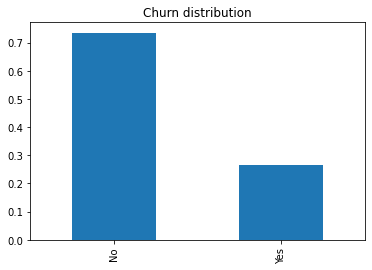

In [11]:
df.Churn.value_counts(normalize=True).plot(kind = "bar")
plt.title("Churn distribution")

for the moment I decide not to perform any downsampling/oversampling 

# CATEGORICAL VARIABLES

# Gender

In [12]:
df.groupby("gender").Churn.value_counts(normalize = True)

gender  Churn
Female  No       0.730586
        Yes      0.269414
Male    No       0.739016
        Yes      0.260984
Name: Churn, dtype: float64

Text(0.5, 1.0, 'gender vs churn')

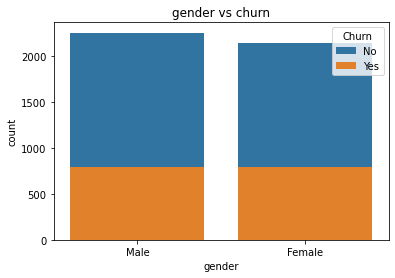

In [13]:
sns.countplot(x = df.gender, hue = df.Churn,data=df, dodge = False)
plt.title("gender vs churn")

I don't see difference in churning levels taking gender into considration....I decide for the moment not to include this feature

# Senior Citizen

In [14]:
df.SeniorCitizen.value_counts()

0    5020
1     966
Name: SeniorCitizen, dtype: int64

In [15]:
df.groupby("SeniorCitizen").Churn.value_counts(normalize = True)

SeniorCitizen  Churn
0              No       0.763944
               Yes      0.236056
1              No       0.583851
               Yes      0.416149
Name: Churn, dtype: float64

Text(0.5, 1.0, 'senior citizen vs churn')

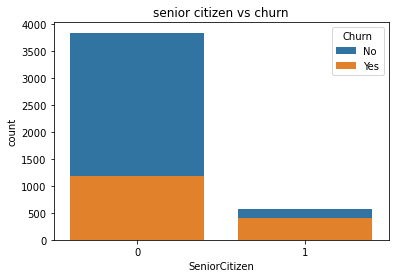

In [16]:
sns.countplot(x = df.SeniorCitizen, hue = df.Churn,data=df, dodge = False)
plt.title("senior citizen vs churn")

it looks like senior citizens are more likely to be churners...as such I deem this variable an important one

# Partner

In [17]:
df.groupby("Partner").Churn.value_counts(normalize = True)

Partner  Churn
No       No       0.671966
         Yes      0.328034
Yes      No       0.801653
         Yes      0.198347
Name: Churn, dtype: float64

Text(0.5, 1.0, 'partner vs churn')

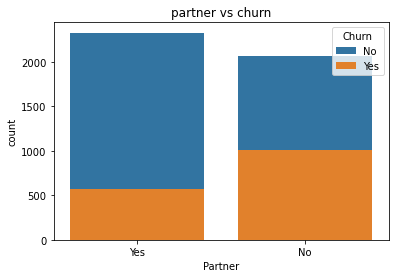

In [18]:
sns.countplot(x = df.Partner, hue = df.Churn,data=df, dodge = False)
plt.title("partner vs churn")

those without a partner seems more likely to be churners...this could be an important variable in predicting the target

# Dependents

In [19]:
df.groupby("Dependents").Churn.value_counts(normalize = True)

Dependents  Churn
No          No       0.688677
            Yes      0.311323
Yes         No       0.843104
            Yes      0.156896
Name: Churn, dtype: float64

Text(0.5, 1.0, 'dependents vs churn')

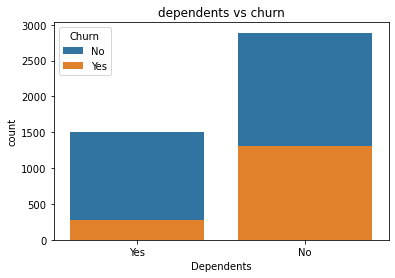

In [20]:
sns.countplot(x = df.Dependents, hue = df.Churn,data=df, dodge = False)
plt.title("dependents vs churn")

those without dependents are more likely to be churners

# Phone Service

In [21]:
df.groupby("PhoneService").Churn.value_counts(normalize = True)

PhoneService  Churn
No            No       0.747458
              Yes      0.252542
Yes           No       0.733506
              Yes      0.266494
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Phone service vs churn')

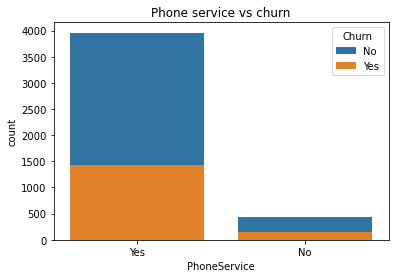

In [22]:
sns.countplot(x = df.PhoneService, hue = df.Churn,data=df, dodge = False)
plt.title("Phone service vs churn")

there isn't a big difference in churning levels considering the phone service variable....I decide not to keep it

# Multiple Lines

In [23]:
df.groupby("MultipleLines").Churn.value_counts(normalize = True)

MultipleLines     Churn
No                No       0.748947
                  Yes      0.251053
No phone service  No       0.747458
                  Yes      0.252542
Yes               No       0.716248
                  Yes      0.283752
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Multiple Lines vs churn')

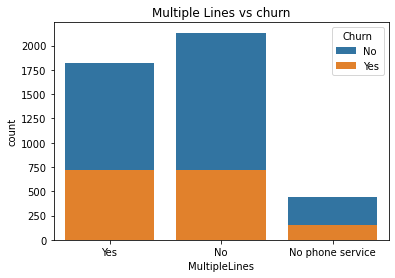

In [24]:
sns.countplot(x = df.MultipleLines, hue = df.Churn,data=df, dodge = False)
plt.title("Multiple Lines vs churn")

Yes and No seems to be similar in terms of churning levels....no phone service differes slightly....I decide to keep this variable...I either create 2 dummies (3-1) or group "yes" and "no" together to get two values and create 1 single dummy (2-1)

# Internet Service

In [25]:
df.groupby("InternetService").Churn.value_counts(normalize = True)

InternetService  Churn
DSL              No       0.808027
                 Yes      0.191973
Fiber optic      No       0.584697
                 Yes      0.415303
No               No       0.923315
                 Yes      0.076685
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Internet Service vs churn')

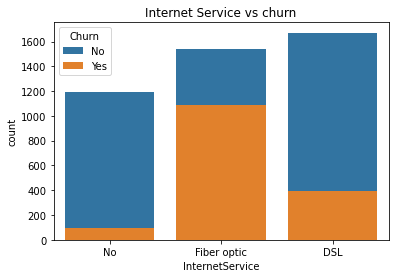

In [26]:
sns.countplot(x = df.InternetService, hue = df.Churn,data=df, dodge = False)
plt.title("Internet Service vs churn")

customers with fiber optic internet service are more likely to be a churner... I keep this variable

# Online Security

In [27]:
df.groupby("OnlineSecurity").Churn.value_counts(normalize = True)

OnlineSecurity       Churn
No                   No       0.583501
                     Yes      0.416499
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.856392
                     Yes      0.143608
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Online Security vs churn')

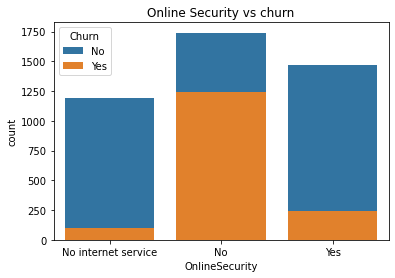

In [28]:
sns.countplot(x = df.OnlineSecurity, hue = df.Churn,data=df, dodge = False)
plt.title("Online Security vs churn")

I can see differences in the churning levels for the different categories...as a result I keep this variable

# Online Backup

In [29]:
df.groupby("OnlineBackup").Churn.value_counts(normalize = True)

OnlineBackup         Churn
No                   No       0.601536
                     Yes      0.398464
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.784689
                     Yes      0.215311
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Online Backup vs churn')

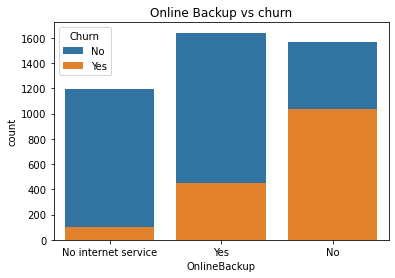

In [30]:
sns.countplot(x = df.OnlineBackup, hue = df.Churn,data=df, dodge = False)
plt.title("Online Backup vs churn")

Again, there are different churning levels for the different categories...I keep this variable

# Device Protection

In [31]:
df.groupby("DeviceProtection").Churn.value_counts(normalize = True)

DeviceProtection     Churn
No                   No       0.609470
                     Yes      0.390530
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.777616
                     Yes      0.222384
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Device Protection vs churn')

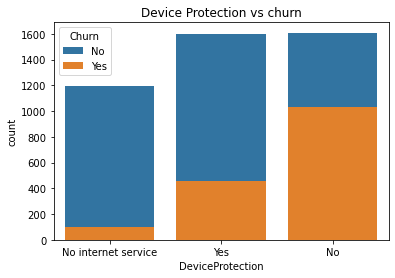

In [32]:
sns.countplot(x = df.DeviceProtection, hue = df.Churn,data=df, dodge = False)
plt.title("Device Protection vs churn")

I keep this variable too since I can see different churning levels based on different categories

# Tech Support

In [33]:
df.groupby("TechSupport").Churn.value_counts(normalize = True)

TechSupport          Churn
No                   No       0.587162
                     Yes      0.412838
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.846686
                     Yes      0.153314
Name: Churn, dtype: float64

sns.countplot(x = df.TechSupport, hue = df.Churn,data=df, dodge = False)
plt.title("Tech Support vs churn")

I keep this variable...those without tech support are much more likely to be churners

# Streaming TV

In [34]:
df.groupby("StreamingTV").Churn.value_counts(normalize = True)

StreamingTV          Churn
No                   No       0.665550
                     Yes      0.334450
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.701214
                     Yes      0.298786
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Streaming TV vs churn')

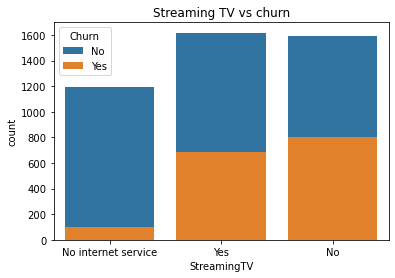

In [35]:
sns.countplot(x = df.StreamingTV, hue = df.Churn,data=df, dodge = False)
plt.title("Streaming TV vs churn")

I keep this variable...those that do not stream tv are more likely to be a churner

# Streaming Movies

In [36]:
df.groupby("StreamingMovies").Churn.value_counts(normalize = True)

StreamingMovies      Churn
No                   No       0.663837
                     Yes      0.336163
No internet service  No       0.923315
                     Yes      0.076685
Yes                  No       0.702437
                     Yes      0.297563
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Streaming Movies vs churn')

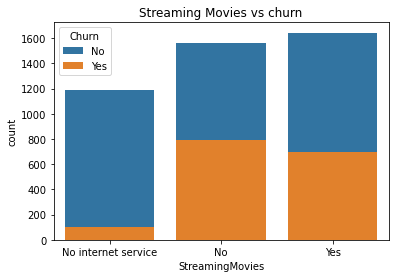

In [37]:
sns.countplot(x = df.StreamingMovies, hue = df.Churn,data=df, dodge = False)
plt.title("Streaming Movies vs churn")

Again, those who do not stream are more likely to be a churner...I keep this variable

# Contract 

In [38]:
df.groupby("Contract").Churn.value_counts(normalize = True)

Contract        Churn
Month-to-month  No       0.572346
                Yes      0.427654
One year        No       0.884013
                Yes      0.115987
Two year        No       0.971548
                Yes      0.028452
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Contract vs churn')

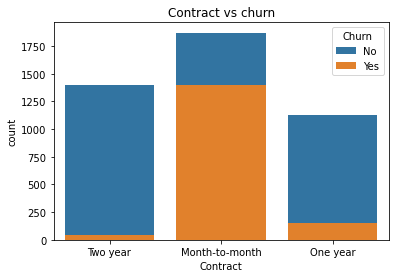

In [39]:
sns.countplot(x = df.Contract, hue = df.Churn,data=df, dodge = False)
plt.title("Contract vs churn")

as the length of the contract increases the likelihood of a customer being a churner decreases... I keep this variable

# Paperless Billing

In [40]:
df.groupby("PaperlessBilling").Churn.value_counts(normalize = True)

PaperlessBilling  Churn
No                No       0.834825
                  Yes      0.165175
Yes               No       0.665249
                  Yes      0.334751
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Paperless Billing vs churn')

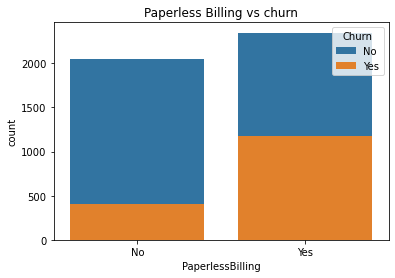

In [41]:
sns.countplot(x = df.PaperlessBilling, hue = df.Churn,data=df, dodge = False)
plt.title("Paperless Billing vs churn")

those with paperless billing are more likely to be churners...I keep this variable

# Payment method 

In [42]:
df.groupby("PaymentMethod").Churn.value_counts(normalize = True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.828746
                           Yes      0.171254
Credit card (automatic)    No       0.848043
                           Yes      0.151957
Electronic check           No       0.550349
                           Yes      0.449651
Mailed check               No       0.807889
                           Yes      0.192111
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Payment Method vs churn')

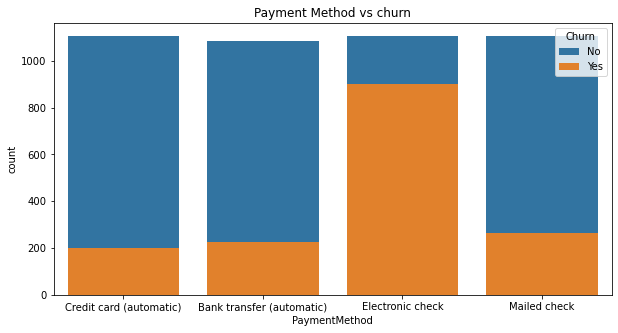

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = df.PaymentMethod, hue = df.Churn,data=df, dodge = False)
plt.title("Payment Method vs churn")

Customers paying with electronic check are much more likely to be churners

In [44]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Churn_binary'],
      dtype='object')

# NUMERICAL VARIABLES

In [45]:
#tenure, monthlycharges, totalCharges

# Tenure

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

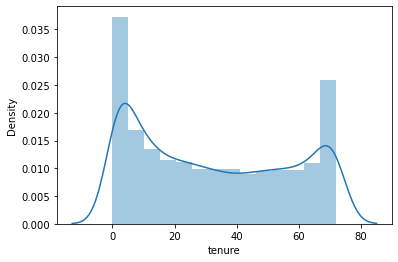

In [46]:
sns.distplot(a = df.tenure)

<AxesSubplot:xlabel='tenure'>

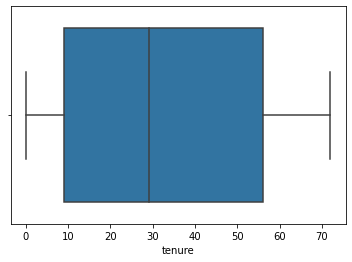

In [47]:
sns.boxplot(x = df.tenure)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

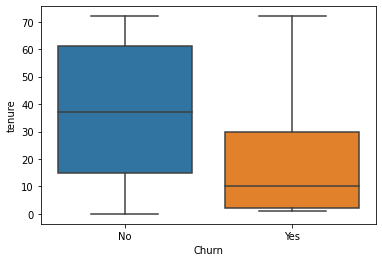

In [48]:
sns.boxplot(x = df.Churn, y = df.tenure)

those with a lower tenure are more likely to be churners...I keep this variable... RUN HYPOTHESIS TEST TO PROVE THAT THEY HAVE DIFFERENT MEANS

# Monthly Charges

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

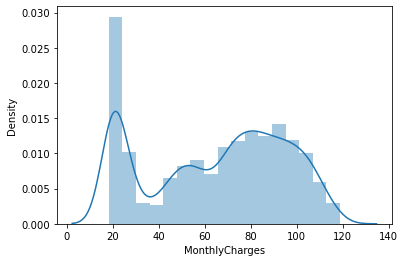

In [49]:
sns.distplot(a = df.MonthlyCharges)

<AxesSubplot:xlabel='MonthlyCharges'>

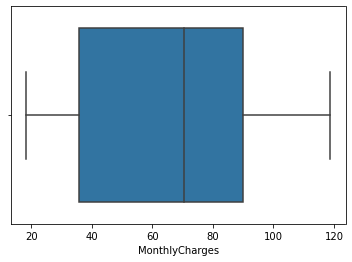

In [50]:
sns.boxplot(x = df.MonthlyCharges)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

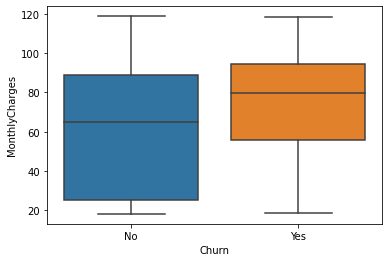

In [51]:
sns.boxplot(x = df.Churn, y = df.MonthlyCharges)

those with higher monthly charges are more likely to be churners...I keep this variable...RUN HYPOTHESIS TEST TO PROVE THE 2 HAVE DIFFERENT MEANS

# Total Charges

In [52]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Churn_binary          int64
dtype: object

In [53]:
#I first need to convert the data type from object to float (I encountered some problems while changing the dtype)

In [54]:
#there must be some rows with no values

In [55]:
df.loc[df.TotalCharges == ' ']

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,0
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0


In [56]:
len(df.loc[df.TotalCharges == ' '])

10

In [57]:
#1there are 10 rows with no values

In [58]:
#I decide to drop them

In [59]:
df.shape

(5986, 23)

In [60]:
len(df.loc[df.TotalCharges != ' '])
#the new df will have 5976 rows

5976

In [61]:
df = df.loc[df.TotalCharges != ' ']

In [62]:
df.shape

(5976, 23)

In [63]:
df["TotalCharges"] = df.TotalCharges.astype(float)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

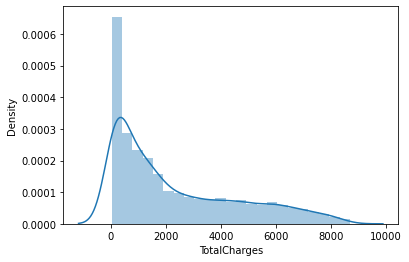

In [64]:
sns.distplot(a = df.TotalCharges)

<AxesSubplot:xlabel='TotalCharges'>

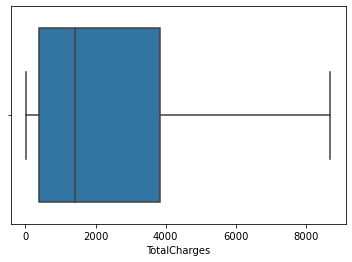

In [65]:
sns.boxplot(x = df.TotalCharges)

I see no outliers

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

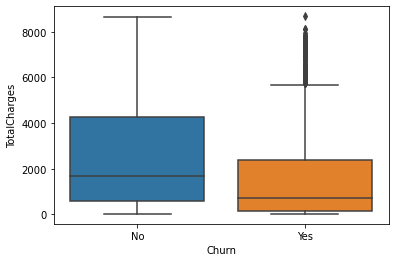

In [66]:
sns.boxplot(x = df.Churn, y = df.TotalCharges)

total charges looks like an important variable...those that are churners have lower total charges compared to those that are not churners...I keep this variable

# SPLIT CATEGORICAL/NUMERICAL

In [67]:
#I create binary columns for the following attributes: partner, dependents, paperless billing

In [68]:
df["Partner_binary"] = df.Partner.apply(lambda x: 1 if x == "Yes" else 0)
df["Dependents_binary"] = df.Dependents.apply(lambda x: 1 if x == "Yes" else 0)
df["Paperlessbilling_binary"] = df.PaperlessBilling.apply(lambda x: 1 if x == "Yes" else 0)

In [69]:
#I create dummies for the remaining categorical variables that I decided to keep 

In [70]:
df_categorical=df[["SeniorCitizen", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]]

In [71]:
dummies = pd.get_dummies(df_categorical,drop_first=True) 

In [72]:
#I create a variable storing numerical variables

In [73]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Churn_binary', 'Partner_binary', 'Dependents_binary',
       'Paperlessbilling_binary'],
      dtype='object')

In [74]:
df_numerical=df[["tenure", "MonthlyCharges", "TotalCharges"]]

In [75]:
#I scale numerical attributes

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

In [77]:
X_numerical=scaled_df

In [78]:
dummies

,SeniorCitizen,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5982,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
5983,0,1,0,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5984,1,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [79]:
# I add binary variables previously created to the dummies variable (storing all the other categorical variables)

In [80]:
dummies["Partner_binary"] = df.Partner_binary
dummies["Dependents_binary"] = df.Dependents_binary
dummies["Paperlessbilling_binary"] = df.Paperlessbilling_binary
dummies["SeniorCitizen"] = df.SeniorCitizen

In [81]:
#I concatenate dummies and numerical variables

In [82]:
print(
dummies.shape,
X_numerical.shape)

(5976, 26) (5976, 3)


In [83]:
dummies.reset_index(inplace=True)
X_numerical.reset_index(inplace=True)

In [84]:
X=pd.concat([dummies,X_numerical], axis = 1)

# FINAL DATASET

In [85]:
X.shape

(5976, 31)

In [86]:
X.columns

Index(['index', 'SeniorCitizen', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Partner_binary', 'Dependents_binary', 'Paperlessbilling_binary',
       'index', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [87]:
X.drop(columns=["index", "index"], inplace=True)

In [88]:
X.head()

,SeniorCitizen,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_binary,Dependents_binary,Paperlessbilling_binary,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,1,0,1,0,...,1,1,0,0,1,1,0,1.611381,-1.353483,-0.247769
1,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0.468468,0.774066,0.736669
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.223558,0.335602,0.251453
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,-1.164265,-0.297182,-0.905725
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,-1.245901,-0.378564,-0.958057


In [89]:
#I isolate the target variable

In [150]:
y=df['Churn']

In [152]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [154]:
len(df.Churn)

5976

In [155]:
len(y)

5976

# SPLIT TRAIN/TEST

In [156]:
#I split the dataset into train and test (70% train and 30% test, I use stratify to keep same proportion of 0 and 1)

In [157]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state= 123) 

print(X_train.shape, X_test.shape)

(4183, 29) (1793, 29)


## Since the objective is to identify the churners (those who do not renew) I choose the algorithm with the highest recall for the 1 class (if someone is a churner I want my algorithm to spot it)

# ML ALGORITHM

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [169]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(50)}


gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'accuracy', verbose=0, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))



f1_train: 0.795843 using {'n_neighbors': 49}


In [170]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
print("f1_test: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy=',gs.best_score_)

f1_train: 0.795843 using {'n_neighbors': 49}
f1_test:  0.5840707964601769
[[1153  164]
 [ 212  264]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1317
           1       0.62      0.55      0.58       476

    accuracy                           0.79      1793
   macro avg       0.73      0.72      0.72      1793
weighted avg       0.78      0.79      0.79      1793

accuracy= 0.7958429798837269


In [181]:
#the accuracy looks good (0.79 meaning 79% of observations are correctly classified) but the f1 score (train-test) shows some overfitting
#to reduce overfitting we may increase the numbers of neighbours

In [173]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5,6,10,15,20],
              'min_samples_split': [16,17,18,19,20,21,22,23,24],
              'min_samples_leaf': [7,8,9,10,11,12,13]}

hyperp_search(classifier,parameters)

f1_train: 0.787235 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 16}
f1_test:  0.47645429362880887
[[1243   74]
 [ 304  172]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1317
           1       0.70      0.36      0.48       476

    accuracy                           0.79      1793
   macro avg       0.75      0.65      0.67      1793
weighted avg       0.78      0.79      0.76      1793

accuracy= 0.7872351128717853


In [180]:
#the decision tree performs almost as the knn in terms of accuracy but there seems to be much more overfitting when looking at the f1 score (train-test)
#in particular it perform particularly bad in spotting 1 (we can see a lot of false negative)
#to reduce overfitting we may reduce the max depth or increase the min_samples_split and min_samples_leaf parameters

In [190]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
parameters = {'n_estimators': [70,80,100,150],'criterion': ['entropy','gini'], 
              'max_depth': [4,5,8,9,10,11,12],
              'min_samples_split': [10,15,20],
              'min_samples_leaf': [5,8,10,12]}

hyperp_search(classifier,parameters)

f1_train: 0.804928 using {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100}
f1_test:  0.5860023724792408
[[1197  120]
 [ 229  247]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1317
           1       0.67      0.52      0.59       476

    accuracy                           0.81      1793
   macro avg       0.76      0.71      0.73      1793
weighted avg       0.80      0.81      0.80      1793

accuracy= 0.8049278866766134


In [178]:
#AdaBoost

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {'n_estimators' : [100, 120,130],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

hyperp_search(classifier,parameters)

f1_train: 0.793450 using {'learning_rate': 0.1, 'n_estimators': 130}
f1_test:  0.5728518057285181
[[1220   97]
 [ 246  230]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1317
           1       0.70      0.48      0.57       476

    accuracy                           0.81      1793
   macro avg       0.77      0.70      0.72      1793
weighted avg       0.80      0.81      0.80      1793

accuracy= 0.7934503495624039


In [182]:
#again we can see some overfitting..accuracy looks the same
#to reduce overfitting the learning rate may be changed

In [187]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'] , "max_iter":[1000]}

hyperp_search(classifier,parameters)

f1_train: 0.798712 using {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
f1_test:  0.6100558659217877
[[1171  146]
 [ 203  273]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1317
           1       0.65      0.57      0.61       476

    accuracy                           0.81      1793
   macro avg       0.75      0.73      0.74      1793
weighted avg       0.80      0.81      0.80      1793

accuracy= 0.7987117925148486


## The logistic regression seems the best one ...accuracy aligned to the previous model but we see a smaller difference between the f1 score for the train and test (still overfitting but less)

## The logistic regression has the best recall for the class "1" and a good precision for the same class too